In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
pd.options.display.max_colwidth = 100

In [6]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
import folium
from folium import plugins
from pygeocoder import Geocoder

In [7]:
usr_table = pd.read_csv('data/user_table.csv')
results = pd.read_csv('data/test_results.csv')
usr_table.head()
results.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [8]:
len(usr_table)
len(results)
# usr_table.isnull().sum()
# results.isnull().sum()

275616

316800

In [9]:
usr_table.city.is_unique

False

In [10]:
merged = pd.merge(results, usr_table, on='user_id')
merged.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [11]:
merged.country.value_counts()

USA    275616
Name: country, dtype: int64

In [12]:
# number of people that see each price
count=merged.groupby ("price")['price', 'converted'].count()
# mean conversion ratio per click for each price
price=merged.groupby ("price")['price', 'converted'].mean()
count
price

,price,converted
price,,
39,176376,176376
59,99240,99240


,price,converted
price,,
39,39.0,0.019753
59,59.0,0.015468


In [13]:
P39=0.019753
P59=0.015468
c39=176376
c59=99240
sigma_39= np.sqrt(P39*(1-P39)/c39)
sigma_59= np.sqrt(P59*(1-P59)/c59)



std=P39**2 + P59**2


zstat=(P59-P39)/std
zstat

#p-value is very high => reject null hypothesis

-6.807638178933558

### Fewer people see the higher price
###  Lower price has a higher conversion ratio

In [14]:
#If all units were sold at the indicated price the units sold will be
total_sold=price.converted*len(merged)
total_sold=total_sold.reset_index()
total_sold.head()

,price,converted
0,39,5444.312968
1,59,4263.105200


### If all units were sold at the indicated price the units sold if the price were at 39 USD is ~5444. About 1200 less units are sold if the price is hiked to 59 USD

###  Next I want to find the net revenue for each price

In [15]:
total_sold['revenue']=total_sold['price']*total_sold['converted']
total_sold

,price,converted,revenue
0,39,5444.312968,212328.205742
1,59,4263.105200,251523.206771


In [16]:
total_sold['revenue'][1]-total_sold['revenue'][0]

39195.001029185281

### Even though fewer units will be sold, the revenue goes up by ~ 39K USD with the price hike!
## The company should sell it's software at $59

In [17]:
merged.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [18]:


# f, (ax2) = plt.subplots(1,1,figsize=(18, 5))


# # sns.countplot(x='Age_years',data=tdata2, ax=ax1, hue='Solve Match Pos')
# g=sns.countplot(x='price',data=merged, ax=ax2, hue="converted")
# # g.set(ylim=(0, 500))



In [19]:
tdf_counts=merged.groupby(['source'])['converted'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
tdf_counts2=tdf_counts[tdf_counts["converted"]==1].sort_values(by=["percentage"])
tdf_counts2

,source,converted,percentage
1,ads-bing,1,1.196762
11,direct_traffic,1,1.214967
9,ads_other,1,1.437663
5,ads-yahoo,1,1.459854
23,seo_facebook,1,1.586099
19,seo-other,1,1.588483
21,seo-yahoo,1,1.660795
17,seo-google,1,1.701642
7,ads_facebook,1,2.120134
15,seo-bing,1,2.134472


In [21]:
tdf_counts_os=merged.groupby(['operative_system'])['converted'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
tdf_counts_os=tdf_counts_os[tdf_counts["converted"]==1].sort_values(by=["percentage"])
tdf_counts_os


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,operative_system,converted,percentage
5,linux,1,0.853054
9,other,1,1.230291
1,android,1,1.483807
11,windows,1,1.672348
3,iOS,1,2.225784
7,mac,1,2.432321


In [22]:
tdf_counts_dev=merged.groupby(['device'])['converted'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
tdf_counts_dev=tdf_counts_dev[tdf_counts_dev["converted"]==1].sort_values(by=["percentage"])
tdf_counts_dev

,device,converted,percentage
3,web,1,1.790900
1,mobile,1,1.842029


In [40]:
tdf_counts_c=merged.groupby(['city'])['converted'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
tdf_counts_c2=merged.groupby(['city'])['converted'].value_counts().rename('counts').reset_index()
tdf_counts_c['counts']=tdf_counts_c2['counts']
tdf_counts_c=tdf_counts_c[(tdf_counts_c['counts']>35) & (tdf_counts_c['converted']==1)]
tdf_counts_c=tdf_counts_c.sort_values(by=["percentage"])
tdf_counts_c

,city,converted,percentage,counts
712,Indianapolis,1,1.398819,45
286,Chicago,1,1.411995,101
730,Jacksonville,1,1.549053,45
814,Las Vegas,1,1.690025,41
1009,New York,1,1.720522,443
1344,San Jose,1,1.729278,58
695,Houston,1,1.789442,120
1150,Philadelphia,1,1.810311,46
1390,Seattle,1,1.814882,40
1330,San Antonio,1,1.834664,85


In [41]:
results = Geocoder.geocode("Indianapolis")
results.coordinates[0]

39.768403

In [38]:
# def latextracter (row):
#     result=Geocoder.geocode(row["city"])
#     return result[0]
# def longextracter (row):
#     result=Geocoder.geocode(row["city"])
#     return result[1]

In [42]:
# lat=tdf_counts_c.apply (latextracter, axis=1)


In [43]:
# long=tdf_counts_c.apply (longextracter, axis=1)

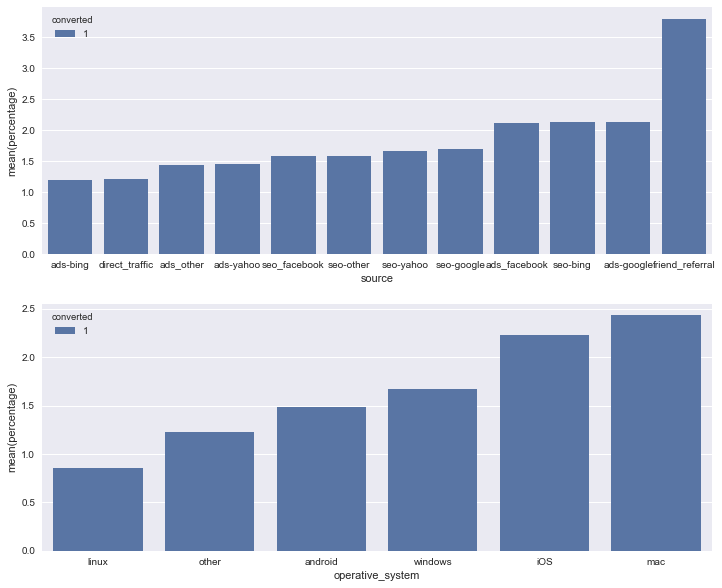

In [24]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 10))

g=sns.barplot(x="source",y="percentage", data=tdf_counts2,hue='converted', ax=ax1)
g=sns.barplot(x="operative_system",y="percentage", data=tdf_counts_os,hue='converted', ax=ax2)

# g=sns.barplot(x="device",y="percentage", data=tdf_counts_dev,hue='converted', ax=ax2)
# ax1.legend_.remove()


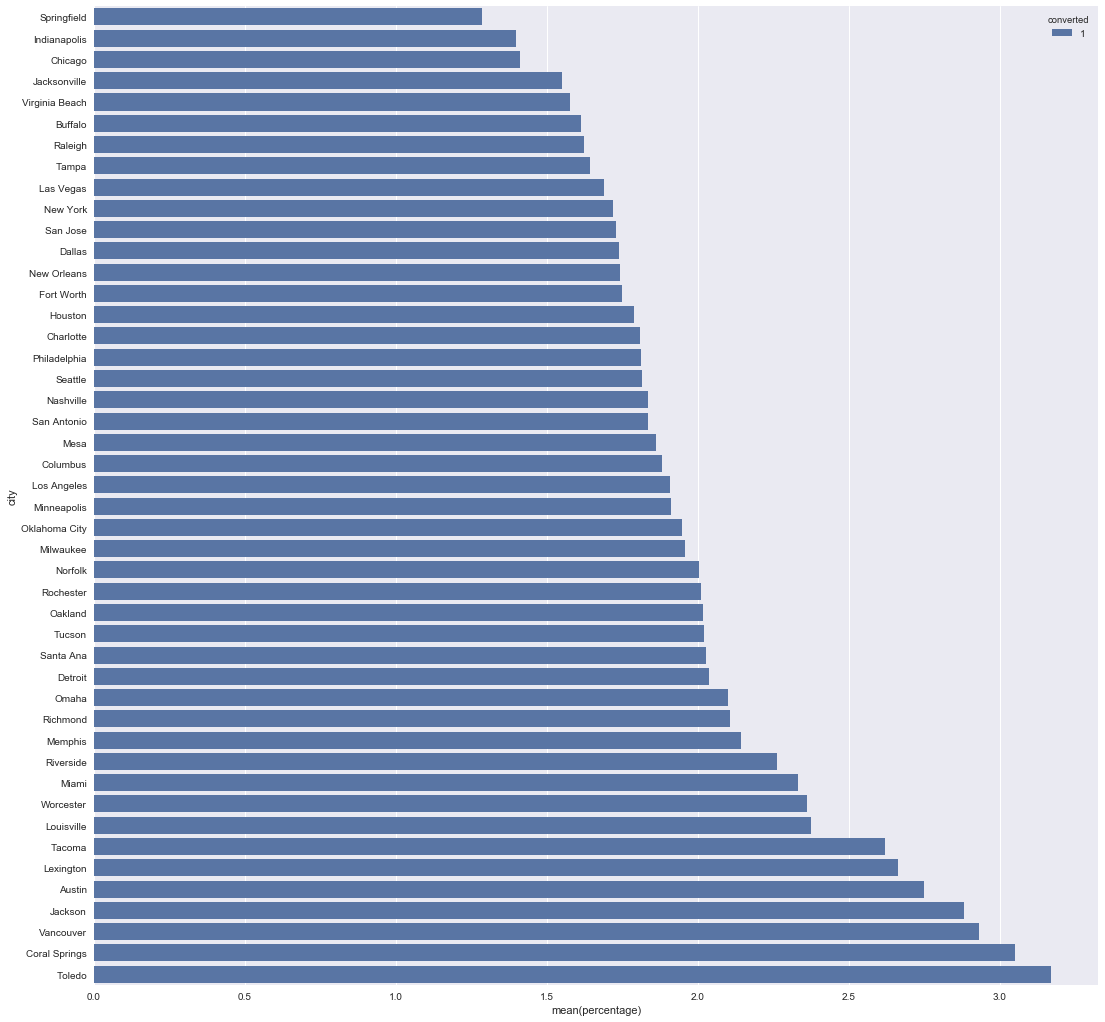

In [273]:
f, (ax2) = plt.subplots(1,1, figsize=(18,18))

g=sns.barplot(y="city",x="percentage", data=tdf_counts_c,hue='converted', ax=ax2)

In [28]:
heat_map = folium.Map(location=[merged['lat'].mean(), merged['long'].mean()], zoom_start=4)
heat_map.add_children(plugins.HeatMap([[row["lat"], row["long"]] for name, row in merged[merged.converted==1].iterrows()]))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  from ipykernel import kernelapp as app


In [147]:
# pd.to_datetime(merged['timestamp'], errors='ignore')

## Summary 2: 

### 1. Friend referral has best conversion ratio at > 3.5% - increase invation rate by offering perks or cash bonuses to existing customers that invite friends.

### 2. Bing ads do worse than direct traffic and can be scrapped.

### 3. Apple product (Mac and iOS) users have a higher conversion ratio - digging into the reason will reveal whether to increase advertising to non-apple users or to specificially target apple users.

### 4. No geographical significance to product sales, cities with high conversion ratio are spread countrywide.

### 5. Product has not been introduced in global markets, very few sales outside of US!


In [148]:
# if ':60:' in merged.loc[49,'timestamp']:
#     merged.loc[49,'timestamp'].replace(":60:",":59:")


'2015-04-24 12:59:46'

In [44]:
merged.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [48]:
def time_fix (row):
    if ':60:' in row['timestamp']:
        rowstamp=row['timestamp'].replace(":60:",":59:")
    elif ':60' in row['timestamp']:
        rowstamp=row['timestamp'].replace(":60",":59")
    else:
        rowstamp=row['timestamp']
    return rowstamp

In [49]:
merged['timestamp']=merged.apply(time_fix, axis=1)

In [50]:
merged['timestamp']=pd.to_datetime(merged['timestamp'])

In [79]:
merged['timestamp']=merged['timestamp'].dt.date

In [80]:
strt=merged['timestamp'].min()
endd=merged['timestamp'].max()


In [81]:
# merged['timestamp'].dt.date

In [82]:
d = pd.date_range(start=strt, end=endd, freq='D')    
# print(d)

DatetimeIndex(['2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05',
               '2015-03-06', '2015-03-07', '2015-03-08', '2015-03-09',
               '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13',
               '2015-03-14', '2015-03-15', '2015-03-16', '2015-03-17',
               '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-21',
               '2015-03-22', '2015-03-23', '2015-03-24', '2015-03-25',
               '2015-03-26', '2015-03-27', '2015-03-28', '2015-03-29',
               '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02',
               '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06',
               '2015-04-07', '2015-04-08', '2015-04-09', '2015-04-10',
               '2015-04-11', '2015-04-12', '2015-04-13', '2015-04-14',
               '2015-04-15', '2015-04-16', '2015-04-17', '2015-04-18',
               '2015-04-19', '2015-04-20', '2015-04-21', '2015-04-22',
               '2015-04-23', '2015-04-24', '2015-04-25', '2015-04-26',
      

In [173]:
grped=pd.DataFrame(data=d, columns=["day"])
grped=grped.reset_index()
grped.rename(columns={'index':'day_p' }, inplace=True)
grped.head()

,day_p,day
0,0,2015-03-02
1,1,2015-03-03
2,2,2015-03-04
3,3,2015-03-05
4,4,2015-03-06


In [174]:
grped['day']=grped['day'].dt.date

In [175]:
prices=pd.DataFrame(data=[39,59], columns=["price"])

grped['key']=1
prices['key']=1

df = pd.merge(grped, prices, on='key')
converted=pd.DataFrame(data=[0,1], columns=["converted"])
converted['key']=1
df = pd.merge(df, converted, on='key')


del df['key']

df.head(5)

,day_p,day,price,converted
0,0,2015-03-02,39,0
1,0,2015-03-02,39,1
2,0,2015-03-02,59,0
3,0,2015-03-02,59,1
4,1,2015-03-03,39,0
5,1,2015-03-03,39,1
6,1,2015-03-03,59,0
7,1,2015-03-03,59,1
8,2,2015-03-04,39,0
9,2,2015-03-04,39,1


In [176]:
merged.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [177]:
# row1=df.iloc[1,:]

In [178]:
# df['day'].min()

datetime.date(2015, 3, 2)

In [179]:
# row1['day']

datetime.date(2015, 3, 2)

In [180]:
# merged['timestamp'].min()

datetime.date(2015, 3, 2)

In [181]:
# merged[merged['timestamp']==row1['day']]

In [182]:
# row1['price']

39

In [183]:
# merged[(merged['timestamp']==row1['day'])&(merged['price']==row1['price'])&(merged['converted']==row1['converted'])]

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
19732,757564,2015-03-02,direct_traffic,mobile,iOS,0,39,1,Largo,USA,27.91,-82.78
24662,139883,2015-03-02,ads_facebook,web,windows,0,39,1,Sugar Land,USA,29.62,-95.62
50935,194813,2015-03-02,seo-google,web,windows,0,39,1,Riverside,USA,33.94,-117.40
61865,592221,2015-03-02,friend_referral,mobile,iOS,0,39,1,Buffalo,USA,42.89,-78.86
80359,499639,2015-03-02,ads_facebook,web,windows,0,39,1,Amarillo,USA,35.20,-101.82
93430,378471,2015-03-02,seo-google,web,windows,0,39,1,Billerica,USA,42.56,-71.26
112546,660034,2015-03-02,friend_referral,mobile,iOS,0,39,1,Memphis,USA,35.11,-90.01
121005,575264,2015-03-02,direct_traffic,web,windows,0,39,1,Birmingham,USA,33.53,-86.80
124557,230643,2015-03-02,friend_referral,web,windows,0,39,1,Fountainbleau,USA,25.77,-80.35
126234,293219,2015-03-02,seo_facebook,web,mac,0,39,1,San Leandro,USA,37.71,-122.15


In [184]:
def summer (row1):
    vals=merged[(merged['timestamp']==row1['day'])&(merged['price']==row1['price'])&(merged['converted']==row1['converted'])].groupby(['price'])['price'].count()
    head_count_val_in=vals.values.tolist()    
    if len (head_count_val_in)==0:
        head_count_val_in.append(0)

      
    
    head_count=head_count_val_in[0]
    return head_count

In [185]:
valus=df.apply(summer, axis=1)

In [186]:
# valus

In [244]:
df['counts']=valus
df.head()

,day_p,day,price,converted,counts,cum_counts,total_rev
0,0,2015-03-02,39,0,868,868,33852
1,0,2015-03-02,39,1,15,15,585
2,0,2015-03-02,59,0,495,495,29205
3,0,2015-03-02,59,1,8,8,472
4,1,2015-03-03,39,0,791,1659,64701


In [245]:
df['cum_counts']=df.groupby(['price', 'converted'])['counts'].cumsum()

df.head(5)

,day_p,day,price,converted,counts,cum_counts,total_rev
0,0,2015-03-02,39,0,868,868,33852
1,0,2015-03-02,39,1,15,15,585
2,0,2015-03-02,59,0,495,495,29205
3,0,2015-03-02,59,1,8,8,472
4,1,2015-03-03,39,0,791,1659,64701
5,1,2015-03-03,39,1,19,34,1326
6,1,2015-03-03,59,0,495,990,58410
7,1,2015-03-03,59,1,4,12,708
8,2,2015-03-04,39,0,802,2461,95979
9,2,2015-03-04,39,1,24,58,2262


In [246]:
df['total_rev']=df['price']*df['cum_counts']

In [247]:
df2=df.copy(deep=True)

In [248]:
df2.head()

,day_p,day,price,converted,counts,cum_counts,total_rev
0,0,2015-03-02,39,0,868,868,33852
1,0,2015-03-02,39,1,15,15,585
2,0,2015-03-02,59,0,495,495,29205
3,0,2015-03-02,59,1,8,8,472
4,1,2015-03-03,39,0,791,1659,64701


In [252]:
df2 = df.pivot_table(
    values='cum_counts',
    index=['day_p', 'day','price'],
    columns='converted'
    )

# Formatting.
df2.reset_index(inplace=True)
df2.rename(columns={0:"converted_0", 1:"converted_1"}, inplace=True)

In [253]:
df2.head()

converted,day_p,day,price,converted_0,converted_1
0,0,2015-03-02,39,868,15
1,0,2015-03-02,59,495,8
2,1,2015-03-03,39,1659,34
3,1,2015-03-03,59,990,12
4,2,2015-03-04,39,2461,58


In [268]:
df2['converted_t']=df2['converted_0']+df2['converted_1']
df2['sold_ratio']=df2['converted_1']/df2['converted_t']

# df2['rev_gen']=df2['sold_ratio']*df2['price']*df2['converted_t']

In [273]:
mapper=df2.groupby(['day_p'])['converted_t'].sum()

In [277]:
df2['rev_gen']=df2['day_p'].map(mapper)*df2['sold_ratio']*df2['price']

In [285]:
df2.head(5)

converted,day_p,day,price,converted_0,converted_1,rev_gen,sold_ratio,converted_t
0,0,2015-03-02,39,868,15,918.244621,0.016988,883
1,0,2015-03-02,59,495,8,1300.580517,0.015905,503
2,1,2015-03-03,39,1659,34,2110.791494,0.020083,1693
3,1,2015-03-03,59,990,12,1904.251497,0.011976,1002
4,2,2015-03-04,39,2461,58,3512.879714,0.023025,2519


In [239]:
# merged.loc[1,'timestamp'].date()==pd.to_datetime("2015-05-10").date()

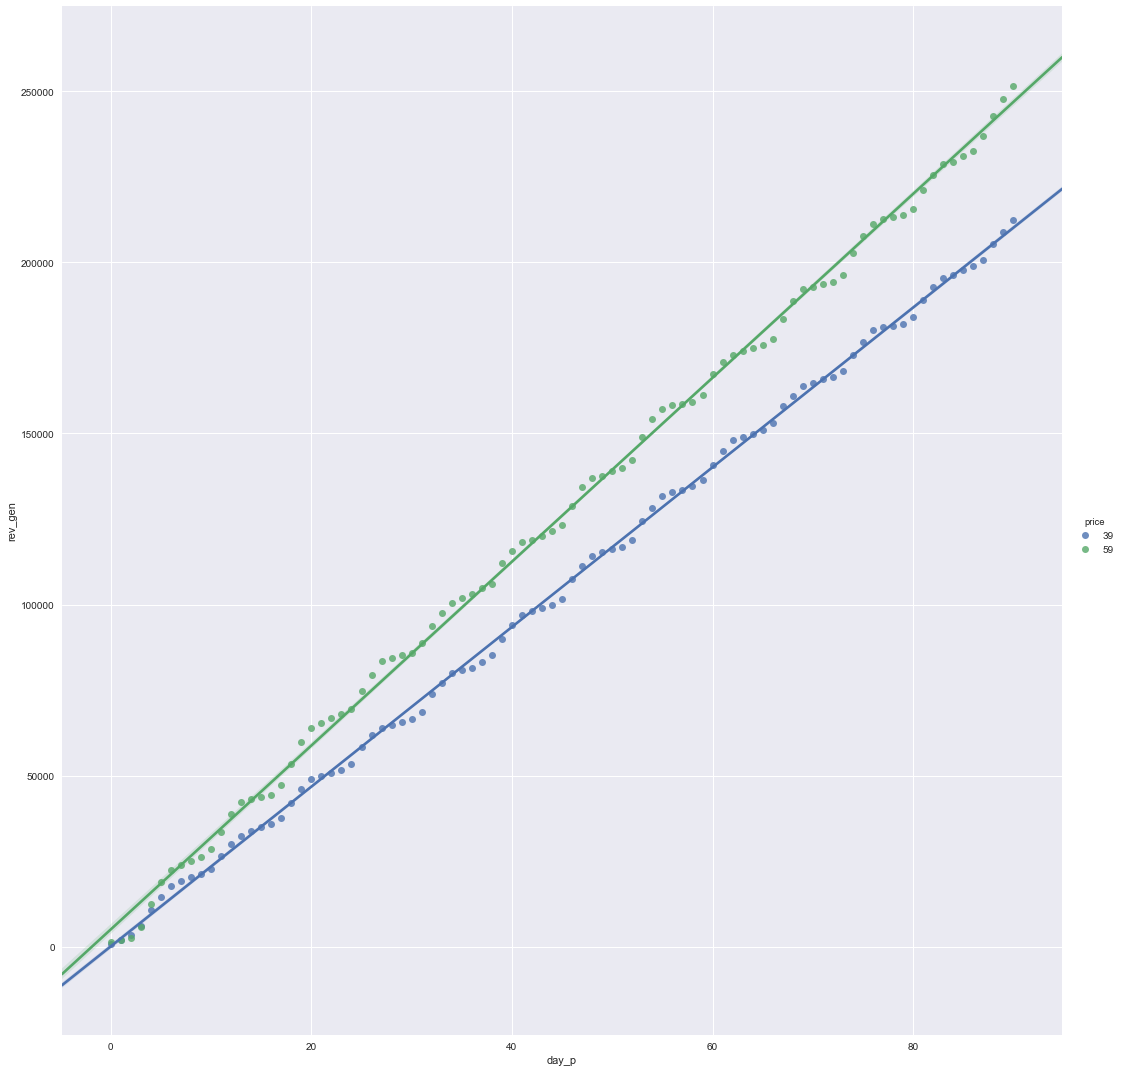

In [281]:
# f, (ax2) = plt.subplots(1,1,figsize=(18, 5))


# sns.countplot(x='Age_years',data=tdata2, ax=ax1, hue='Solve Match Pos')
g=sns.lmplot(x='day_p', y='rev_gen', data=df2, hue='price',  size=15, sharey=False)


## Summary 3:

### 1. There is periodicity in the day for revenue generated (period = 1 week)
### 2. New price, 59 USD does better than the current price from week 2 onwards - the test could have been stopped after 2 weeks.

In [284]:
# merged.isnull().sum()
# len(merged)

In [283]:
# merged.describe()

In [282]:
# sns.pairplot(merged)

In [284]:
# merged2=merged.copy(deep=True)

In [ ]:

# merged=pd.get_dummies(columns=['operative_system'], data=merged) #One hot encoding
# merged=pd.get_dummies(columns=['device'], data=merged) #One hot encoding
# merged=pd.get_dummies(columns=['source'], data=merged) #One hot encoding
# merged=pd.get_dummies(columns=['city'], data=merged) #One hot encoding

In [ ]:


# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(20, 20))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# sns.heatmap(merged.corr(),  cmap=cmap, annot=True, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

